In [24]:

import pandas as pd
import os

LIMIT = int(1e2)

BASE_DIR = 'airbus-ship-detection/'


TRAIN_PATH = BASE_DIR + 'train_v2/'
TEST_PATH = BASE_DIR + 'test_v2/'
MASKS_PATH = BASE_DIR + 'train_ship_segmentations_v2.csv'

train = os.listdir(TRAIN_PATH)
test = os.listdir(TEST_PATH)

print(f'Sz of train dataset : {len(train)} |{train[:LIMIT]}')
print(f'Sz of test dataset : {len(test)} |{test[:LIMIT]}')

Sz of train dataset : 192556 |['4a5b2532e.jpg', '34b973fb0.jpg', '133b13bda.jpg', '5ecf4344b.jpg', '96f178a96.jpg', 'b5b6373bb.jpg', 'a78a82b25.jpg', 'c50310bc5.jpg', '531054a2b.jpg', '4235d2d8f.jpg', 'b0f4d07ed.jpg', '0deadf346.jpg', '2a9e2ac00.jpg', 'fa5c0c8b7.jpg', '6098e0ec7.jpg', '46d5ace64.jpg', '4790fd62c.jpg', 'cb9e718ee.jpg', '7ae2572ee.jpg', '6076a2546.jpg', 'c5ab26d22.jpg', '271956629.jpg', '5d8c071c4.jpg', '567261abb.jpg', 'a5ca05522.jpg', '448a95362.jpg', 'bad7a9587.jpg', 'a0c72d497.jpg', '75f2305a4.jpg', 'f56fa13de.jpg', '3cdc5adb9.jpg', '944c752de.jpg', '0af151ad2.jpg', '66a93d57b.jpg', '64c3335d0.jpg', '98f33d745.jpg', '3cf656feb.jpg', '938c8d3d3.jpg', '7ef0386e6.jpg', '7e86c4e26.jpg', '2880e817b.jpg', '84eed2fa0.jpg', 'ffd6a9ac7.jpg', '10dfa91c8.jpg', 'ca18c4ece.jpg', 'bc5a522cb.jpg', '6e7ebfd3f.jpg', '83aadba9d.jpg', '804f0977d.jpg', '65ffb677f.jpg', '877c2026b.jpg', '673e1b210.jpg', 'dcbd287ff.jpg', '9de779fbe.jpg', 'c9b34541b.jpg', 'b17ae157f.jpg', '1d7ff6175.jpg', 

In [25]:
masks = pd.read_csv(MASKS_PATH)
masks

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
...,...,...
231718,fffedbb6b.jpg,NaN
231719,ffff2aa57.jpg,NaN
231720,ffff6e525.jpg,NaN
231721,ffffc50b4.jpg,NaN


In [26]:
print(f'Total amount of unique photos: {len(masks.ImageId.unique())}')

Total amount of unique photos: 192556


In [27]:
import numpy as np

def rle_encode(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)
 
def rle_decode(mask_rle, shape=(768,768)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T


In [28]:
def concat_mask(mask_list):
    all_masks = np.zeros((768, 768), dtype=np.int16)
    for mask in mask_list:
        if isinstance(mask, str):
            all_masks += rle_decode(mask)
    return np.expand_dims(all_masks, -1)

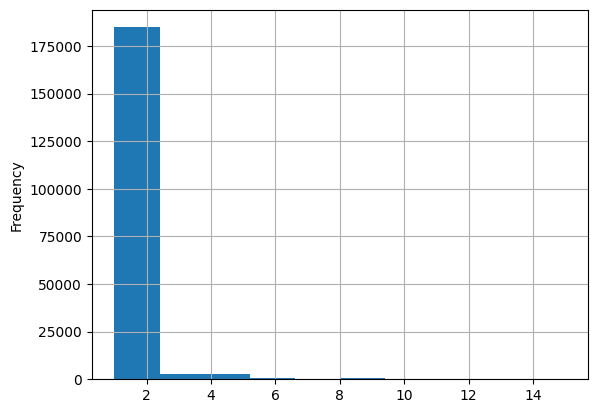

In [29]:
masks.ImageId.value_counts().plot.hist().grid(True)

In [30]:
ships = masks.copy()
ships['Ships'] = ships['EncodedPixels'].notnull().astype(int)
ships = ships.groupby('ImageId').sum().reset_index()

ships.EncodedPixels = ships.EncodedPixels.apply(lambda x: x if x != 0 else '')
ships


,ImageId,EncodedPixels,Ships
0,00003e153.jpg,,0
1,0001124c7.jpg,,0
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...,1
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...,5
4,0001b1832.jpg,,0
...,...,...,...
192551,fffedbb6b.jpg,,0
192552,ffff2aa57.jpg,,0
192553,ffff6e525.jpg,,0
192554,ffffc50b4.jpg,,0


In [31]:
masks.fillna('', inplace=True)
masks

,ImageId,EncodedPixels
0,00003e153.jpg,
1,0001124c7.jpg,
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
...,...,...
231718,fffedbb6b.jpg,
231719,ffff2aa57.jpg,
231720,ffff6e525.jpg,
231721,ffffc50b4.jpg,


In [32]:
from sklearn.model_selection import train_test_split
train_ships, valid_ships = train_test_split(ships, test_size=0.25, stratify=ships.Ships)

train_ships

,ImageId,EncodedPixels,Ships
116602,9afafbf90.jpg,,0
133413,b15d73cdb.jpg,,0
42695,38e709417.jpg,,0
157954,d23e9fc6d.jpg,,0
94012,7cf75a735.jpg,,0
...,...,...,...
181610,f18de7286.jpg,,0
65061,56a1f80f6.jpg,,0
36586,30b025087.jpg,,0
180854,f086cc6b6.jpg,,0


In [33]:
def undersample(df: pd.DataFrame) -> pd.DataFrame:
    return pd.concat([df[df.Ships == 0].sample(n=25000, random_state=42), df[df.Ships != 0]])

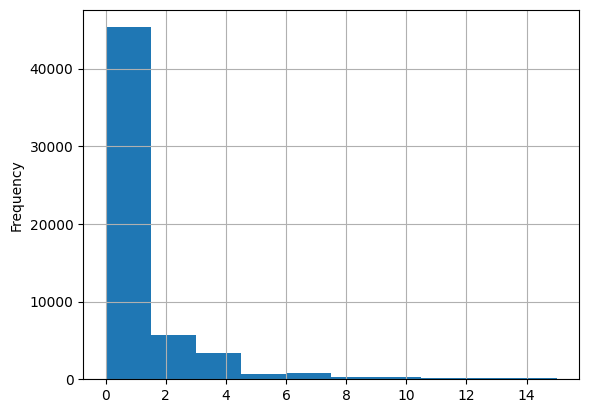

In [34]:
train_ships, valid_ships = undersample(train_ships), undersample(valid_ships)
train_ships.Ships.plot.hist().grid(True)

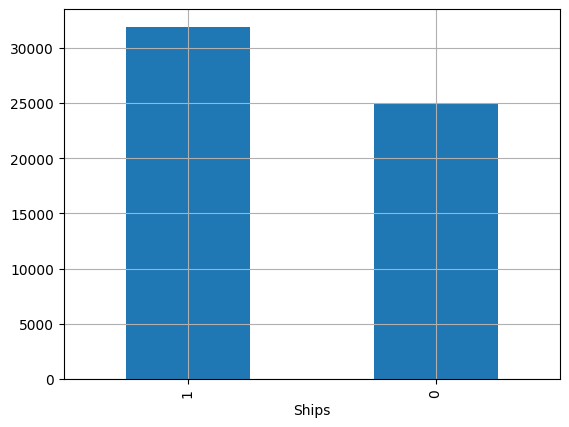

In [38]:

import matplotlib.pyplot as plt
(train_ships.Ships > 0).astype(int).value_counts().plot.bar().grid(True)

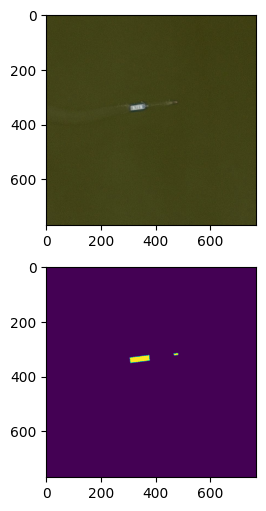

In [91]:
import cv2 as cv
import random

random_img = random.choice(os.listdir(TRAIN_PATH))

test_masks = masks[masks.ImageId == random_img]
msk = concat_mask(list(test_masks.EncodedPixels))


img = cv.imread(TRAIN_PATH + random_img)
fig, axes = plt.subplots(2, 1, figsize=(12, 6))
axes[0].imshow(img)
axes[1].imshow(msk)

In [127]:
import keras

class UnetCNN(object):
    def inpt(self):
        inpts = keras.layers.Input((768, 768, 3))
        return inpts

    def encode(self, inpt, layer_sz):
        S = keras.layers.Conv2D(layer_sz, 3, padding='same', activation='relu')(inpt)
        S = keras.layers.Conv2D(layer_sz, 3, padding='same', activation='relu')(S)
        P = keras.layers.MaxPool2D(pool_size=(2,2))(S)
        return S, P

    def decode(self, prev_inpt, inpt, layer_sz):
        D = keras.layers.UpSampling2D(size=(2,2))(inpt)
        D = keras.layers.Conv2D(layer_sz, 2, padding='same', activation='relu')(D)
        D = self.concat(prev_inpt, D)
        D = keras.layers.Conv2D(layer_sz, 3, padding='same', activation='relu')(D)
        D = keras.layers.Conv2D(layer_sz, 3, padding='same', activation='relu')(D)
        return D

    @staticmethod    
    def bridge(inpt, layer_sz):
        S = keras.layers.Conv2D(layer_sz, 3, padding='same', activation='relu')(inpt)
        S = keras.layers.Conv2D(layer_sz, 3, padding='same', activation='relu')(S)
        return S

    @staticmethod
    def concat(enc_layer, dec_layer):
        enc_layer = keras.layers.concatenate([enc_layer, dec_layer], axis=3)
        return enc_layer

    def build_network(self):
        inpt = self.inpt()
        S1, P1 = self.encode(inpt, 64)
        S2, P2 = self.encode(P1, 128)
        S3, P3 = self.encode(P2, 256)

        B = self.bridge(P3, 512)

        D1 = self.decode(S3, B, 256)
        D2 = self.decode(S2, D1, 128)
        D3 = self.decode(S1, D2, 64)

        output = keras.layers.Conv2D(1, 1, padding='same', activation='sigmoid')(D3)
        model = keras.models.Model(inputs=inpt, outputs=output)

        return model

model = UnetCNN()
built_model = model.build_network()
built_model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18      │ (None, 768, 768,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_173 (Conv2D) │ (None, 768, 768,  │      1,792 │ input_layer_18[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_174 (Conv2D) │ (None, 768, 768,  │     36,928 │ conv2d_173[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_54    │ (None, 384, 384,  │          0 │ conv2d_174[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_175 (Conv2D) │ (None, 384, 384,  │     73,856 │ max_pooling2d_54… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_176 (Conv2D) │ (None, 384, 384,  │    147,584 │ conv2d_175[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_55    │ (None, 192, 192,  │          0 │ conv2d_176[0][0]  │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_177 (Conv2D) │ (None, 192, 192,  │    295,168 │ max_pooling2d_55… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_178 (Conv2D) │ (None, 192, 192,  │    590,080 │ conv2d_177[0][0]  │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_56    │ (None, 96, 96,    │          0 │ conv2d_178[0][0]  │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_179 (Conv2D) │ (None, 96, 96,    │  1,180,160 │ max_pooling2d_56… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_180 (Conv2D) │ (None, 96, 96,    │  2,359,808 │ conv2d_179[0][0]  │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_17    │ (None, 192, 192,  │          0 │ conv2d_180[0][0]  │
│ (UpSampling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_181 (Conv2D) │ (None, 192, 192,  │    524,544 │ up_sampling2d_17… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_20      │ (None, 192, 192,  │          0 │ conv2d_178[0][0], │
│ (Concatenate)       │ 512)              │            │ conv2d_181[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_182 (Conv2D) │ (None, 192, 192,  │  1,179,904 │ concatenate_20[0… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_183 (Conv2D) │ (None, 192, 192,  │    590,080 │ conv2d_182[0][0]

 Total params: 7,697,345 (29.36 MB)

 Trainable params: 7,697,345 (29.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
class BatchData():
    def __init__(self, batch_sz, imgs, masks) -> None:
        self.imgs = imgs
        self.masks = masks
        self.batch_sz = batch_sz

    def get_batch(self, idx):
        sz = idx * self.batch_sz
        sz_next = (idx + 1) * self.batch_sz
        batch_imgs = self.imgs[sz:sz_next]
        imgs = np.array(
            cv.imread(os.path.join(TRAIN_PATH, img_name)
                       for img_name in batch_imgs)
                       )
        msks = np.array(
            concat_mask(self.masks[self.masks['ImageId'] == img_name]['EncodedPixels'])
              for img_name in batch_imgs
            )
        return imgs, msks

In [ ]:
BATCH_SIZE = 16
train_batch = BatchData(BATCH_SIZE, train_ships.ImageId, masks)
valid_batch = BatchData(BATCH_SIZE, valid_ships.ImageId, masks)

